In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('shoe_sales.csv')

In [171]:
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [172]:
df.shape

(60, 3)

In [173]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [174]:
df.brand.value_counts()

brand
Nike      30
Adidas    30
Name: count, dtype: int64

# Nike Analysis

In [175]:
df_nike = df[df['brand'] == 'Nike']
df_nike.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0


In [176]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [177]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [178]:
df_nike[df.sold_qty.isnull()]

/var/folders/jc/plp28ryn3z54kzfx67y_whtc0000gn/T/ipykernel_10436/3539404681.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nike[df.sold_qty.isnull()]


,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [179]:
mean = df_nike.sold_qty.mean()
median = round(df_nike.sold_qty.median())

print(f"Mean: {mean} \nMedian: {median}")

Mean: 19.642857142857142 
Median: 20


In [180]:
df_nike['sold_qty'].fillna(median, inplace=True)

/var/folders/jc/plp28ryn3z54kzfx67y_whtc0000gn/T/ipykernel_10436/2772733140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike['sold_qty'].fillna(median, inplace=True)
/var/folders/jc/plp28ryn3z54kzfx67y_whtc0000gn/T/ipykernel_10436/2772733140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike['sold_qty'].fillna(median, inpla

In [181]:
df_nike.loc[[32, 48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [182]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [183]:
df_nike.sold_qty.sum()

np.float64(590.0)

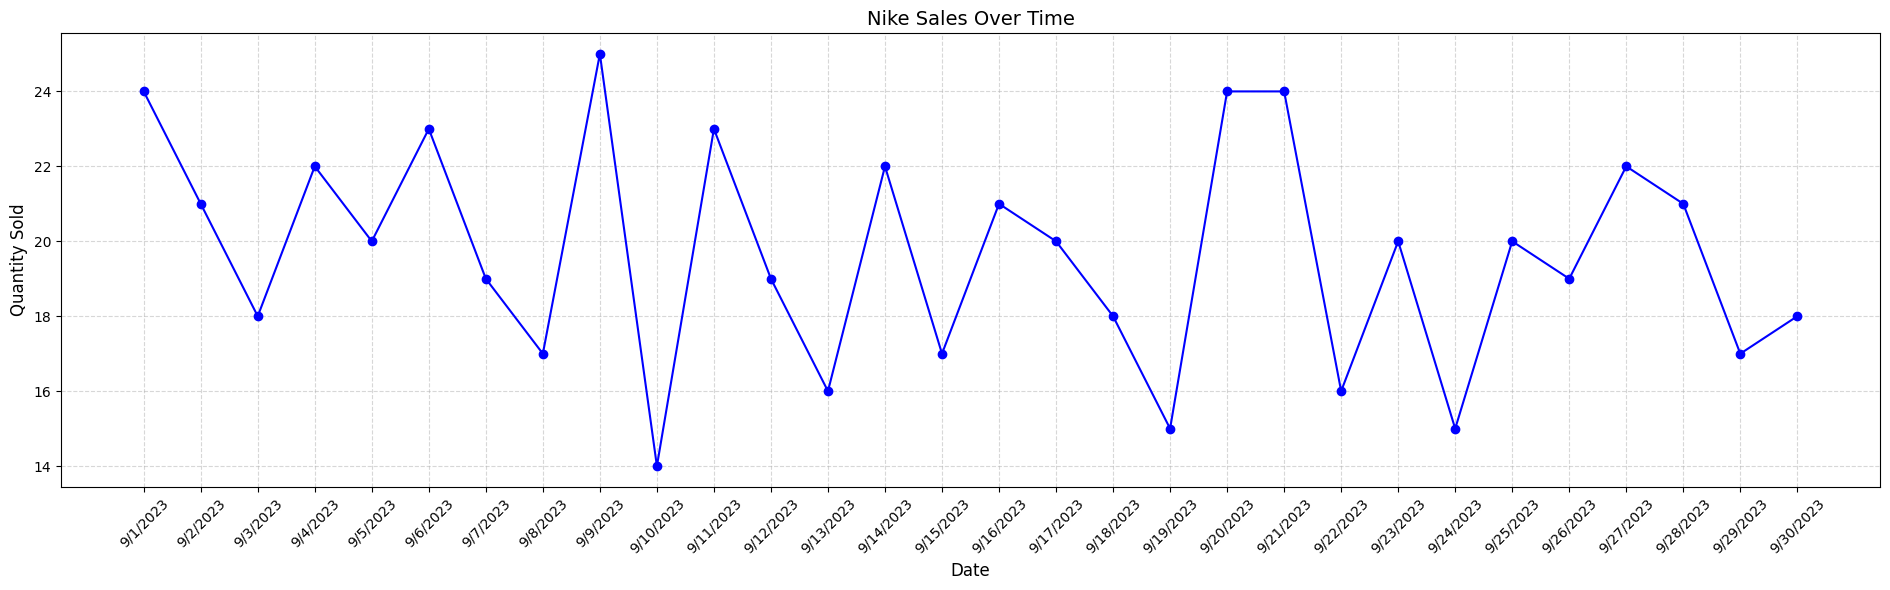

In [184]:
plt.figure(figsize=(19, 6))  # Set figure size
plt.plot(df_nike['date'], df_nike['sold_qty'], marker='o', linestyle='-', color='blue')  # Add marker and customize line
plt.xlabel('Date', fontsize=12)  # Set x-axis label with font size
plt.ylabel('Quantity Sold', fontsize=12)  # Set y-axis label with font size
plt.title('Nike Sales Over Time', fontsize=14)  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
plt.grid(alpha=0.5, linestyle='--')  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

Nike Sales Analysis Results:
- On average we sell 20 Nike shoes per day
- The daily sales range is 14 to 25
- On September we sold 590 Nike shoes. 

# Adidas Sales Analysis

In [185]:
df_adidas = df[df['brand'] == 'Adidas']

In [186]:
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [187]:
df_adidas.shape

(30, 3)

In [188]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [189]:
df_adidas.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [190]:
median = round(df_adidas.sold_qty.median())
median

12

In [191]:
def plot_adidas_sales():
    plt.figure(figsize=(19, 6))  # Set figure size
    plt.plot(df_adidas['date'], df_adidas['sold_qty'], marker='o', linestyle='-', color='blue')  # Add marker and customize line
    plt.xlabel('Date', fontsize=12)  # Set x-axis label with font size
    plt.ylabel('Quantity Sold', fontsize=12)  # Set y-axis label with font size
    plt.title('Nike Sales Over Time', fontsize=14)  # Add a title to the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
    plt.grid(alpha=0.5, linestyle='--')  # Add gridlines for better readability
    plt.tight_layout()  # Adjust layout to prevent label overlap
    plt.show()

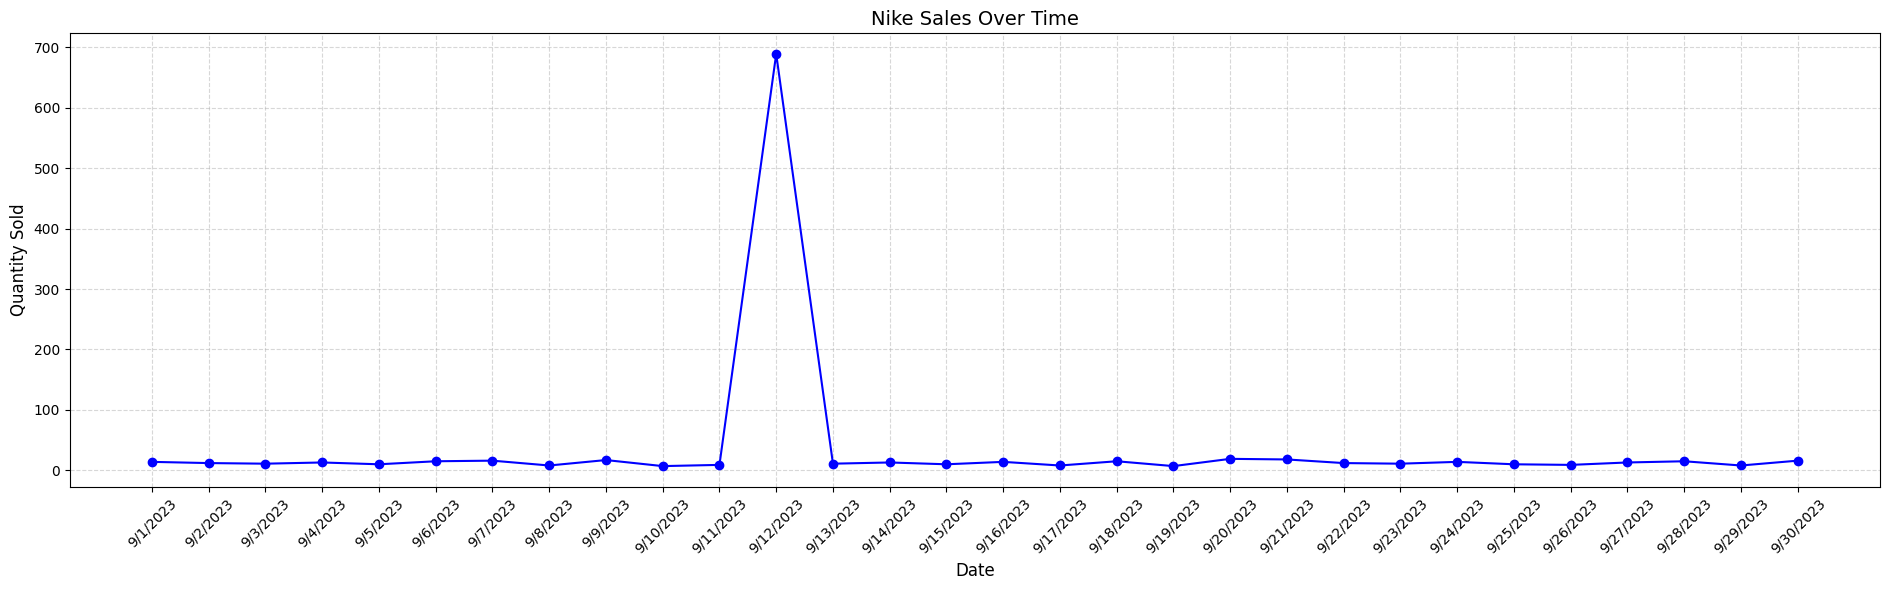

In [192]:
plot_adidas_sales()

In [193]:
outlier_idx = df_adidas.sold_qty.idxmax()

In [194]:
df_adidas.loc[outlier_idx, 'sold_qty'] = median

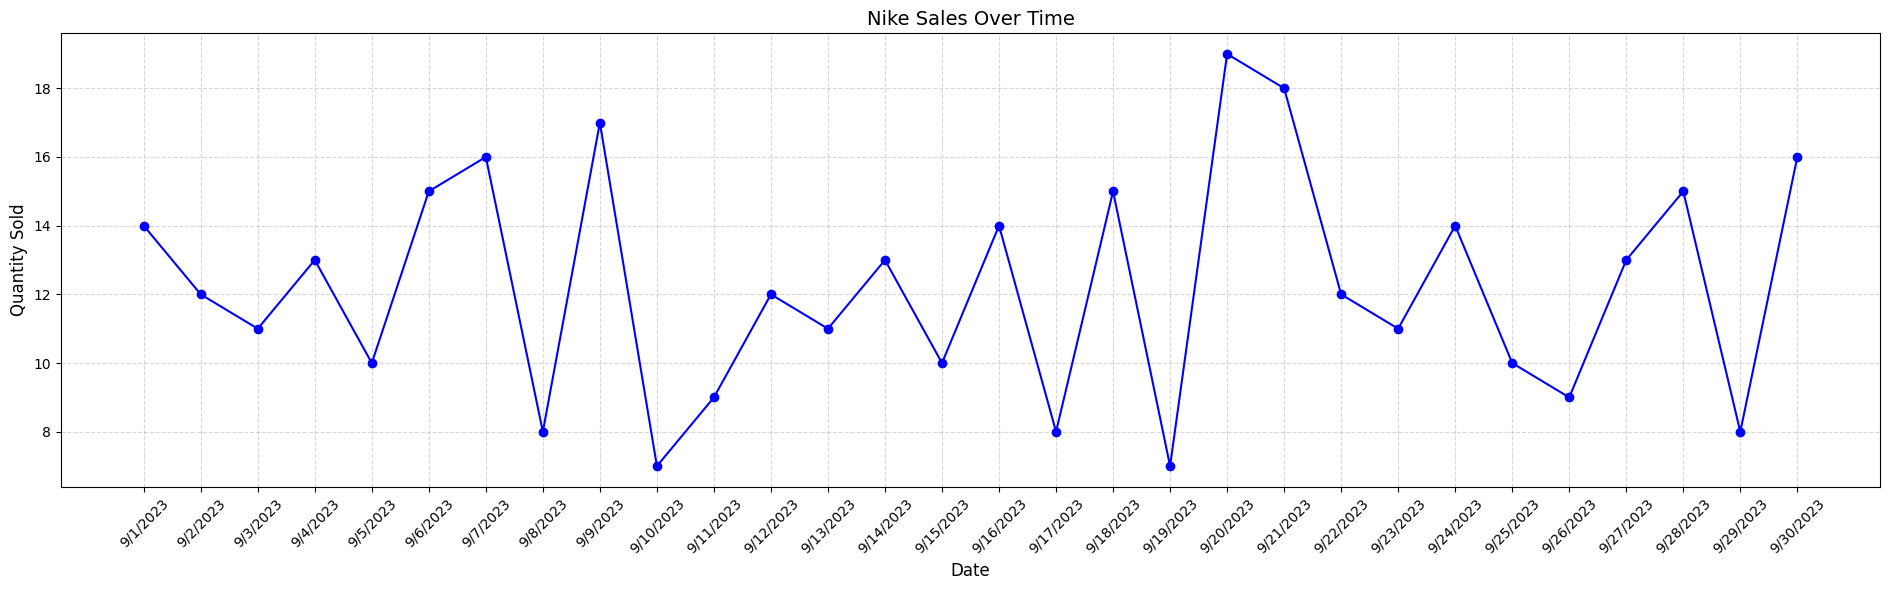

In [196]:
plot_adidas_sales()

In [198]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,12.233333
std,3.287210
min,7.000000
25%,10.000000
50%,12.000000
75%,14.750000
max,19.000000


In [199]:
df_adidas.sold_qty.sum()

np.float64(367.0)

Adidas Sales Analysis:

1. Maximum we sold 19 adidas shoes in a day
2. Adidas shoes are sold between 7 to 19 per day
3. On total we sold 367 adidas shoes in september 

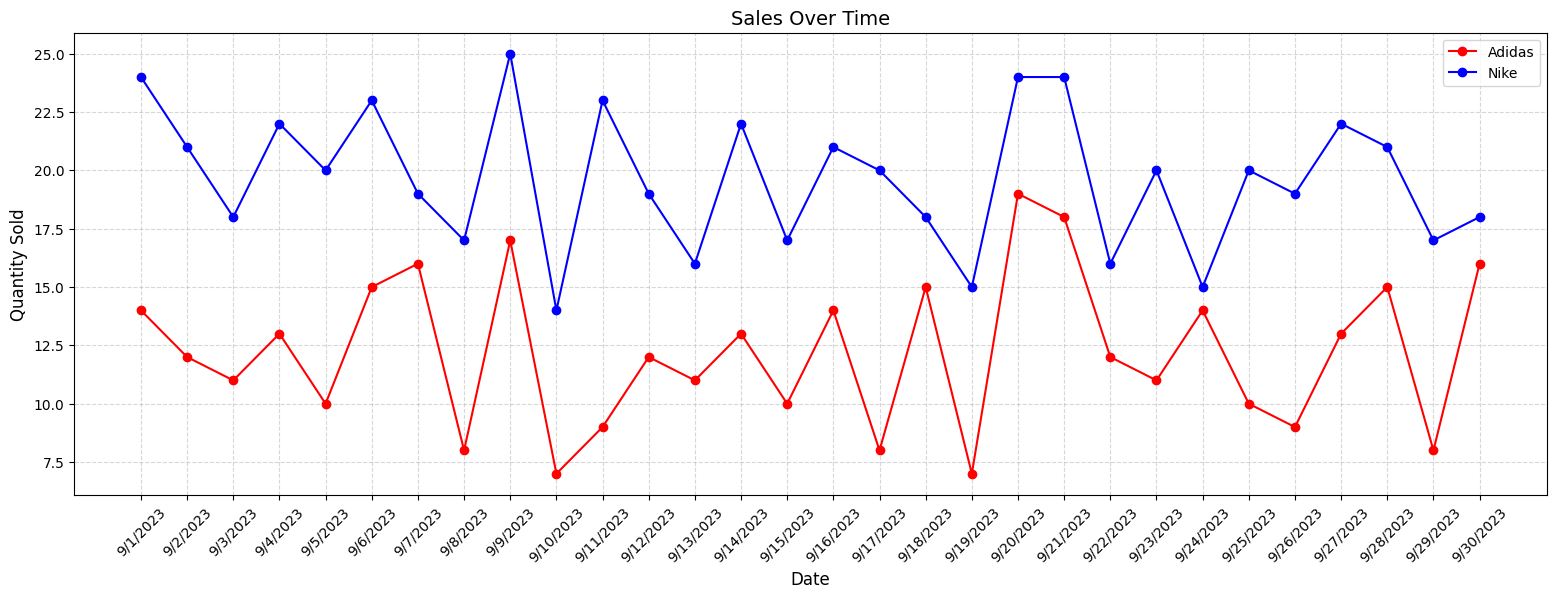

In [212]:
plt.figure(figsize=(19, 6))  # Set figure size

# Plot Adidas sales
plt.plot(df_adidas['date'], df_adidas['sold_qty'], marker='o', linestyle='-', color='red', label='Adidas')

# Plot Nike sales
plt.plot(df_nike['date'], df_nike['sold_qty'], marker='o', linestyle='-', color='blue', label='Nike')

# Set x-axis label with font size
plt.xlabel('Date', fontsize=12)

# Set y-axis label with font size
plt.ylabel('Quantity Sold', fontsize=12)

# Add a title to the plot
plt.title('Sales Over Time', fontsize=14)

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(alpha=0.5, linestyle='--')

# Add a legend to differentiate between Adidas and Nike
plt.legend()

# Show the plot
plt.show()
